<details>
<summary><strong>DBAS3017 User Experience - Group Project</strong></summary>

**Group C:**
- Louise Fear
- James Laurence
- Gabriela Mkonde
- Niki Zheng
- Peter MacKinnon

**Earthquake Data Set:**
Source [Significant Earthquakes Dataset](https://www.kaggle.com/datasets/usamabuttar/significant-earthquakes/)

</details>

In [1]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import HTML
from IPython.display import IFrame
import folium
from folium.plugins import MarkerCluster
import warnings
import cartopy.crs as ccrs

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Dataset Metadata
# time:             The time of the earthquake, reported as the number of milliseconds since the Unix epoch (January 1, 1970, 00:00:00 UTC).
# latitude:         The latitude of the earthquake's epicenter, reported in decimal degrees.
# longitude:        The longitude of the earthquake's epicenter, reported in decimal degrees.
# depth:            The depth of the earthquake, reported in kilometers.
# mag:              The magnitude of the earthquake, reported on various magnitude scales (see magType column below).
# magType:          The magnitude type used to report the earthquake magnitude (e.g. "mb", "ml", "mw").
# nst:              The total number of seismic stations used to calculate the earthquake location and magnitude.
# gap:              The largest azimuthal gap between azimuthally adjacent stations (in degrees).
# dmin:             The distance to the nearest station in degrees.
# rms:              The root-mean-square of the residuals of the earthquake's hypocenter location.
# net:              The ID of the seismic network used to locate the earthquake.
# id:               A unique identifier for the earthquake event.
# updated:          The time when the earthquake event was most recently updated in the catalog, reported as the number of milliseconds since the Unix epoch.
# place:            A human-readable description of the earthquake's location.
# type:             The type of seismic event (e.g. "earthquake", "quarry blast", "explosion").
# horizontalError:  The horizontal error, in kilometers, of the location reported in the latitude and longitude columns.
# depthError:       The depth error, in kilometers, of the depth column.
# magError:         The estimated standard error of the reported earthquake magnitude.
# magNst:           The number of seismic stations used to calculate the earthquake magnitude.
# status:           The status of the earthquake event in the USGS earthquake catalog (e.g. "reviewed", "automatic").
# locationSource:   The ID of the agency or network that provided the earthquake location.
# magSource:        The ID of the agency or network that provided the earthquake magnitude.

In [3]:
# load earthquake dataset with column and index set
eq = pd.read_csv('Significant_Earthquakes.csv', index_col=[0])

# set index
eq.index.name = 'Index'

# display dataframe
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
Index,,,,,,,,,,,,,,,,,,,,,
0,1900-10-09T12:25:00.000Z,57.0900,-153.4800,NaN,7.86,mw,NaN,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1901-03-03T07:45:00.000Z,36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,1901-07-26T22:20:00.000Z,40.8000,-115.7000,NaN,5.00,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,1901-12-30T22:34:00.000Z,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,1902-01-01T05:20:30.000Z,52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99554,2023-11-06T21:31:01.203Z,-7.4821,156.1245,38.062,5.30,mww,169.0,26.0,5.120,0.49,...,2023-11-30T04:18:42.040Z,NaN,earthquake,9.59,4.538,0.083,14.0,reviewed,us,us
99555,2023-11-05T13:27:28.428Z,51.5184,178.3647,80.999,5.10,mb,71.0,143.0,0.457,0.81,...,2023-12-03T13:37:40.037Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,7.14,5.544,0.025,500.0,reviewed,us,us
99556,2023-11-04T09:38:37.943Z,20.2138,147.6712,10.000,5.00,mb,98.0,77.0,7.112,0.59,...,2023-12-02T09:48:49.538Z,Mariana Islands region,earthquake,9.40,1.837,0.032,305.0,reviewed,us,us


In [4]:
# Display dataframe shape
print(f'Earthquake Dataframe Shape is {eq.shape}')

Earthquake Dataframe Shape is (99559, 22)


In [5]:
# Display dataframe info
# eq.info()

# <class 'pandas.core.frame.DataFrame'>
# Index: 99559 entries, 0 to 99558
# Data columns (total 22 columns):
#  #   Column           Non-Null Count  Dtype  
# ---  ------           --------------  -----  
#  0   time             99559 non-null  object 
#  1   latitude         99559 non-null  float64
#  2   longitude        99559 non-null  float64
#  3   depth            99274 non-null  float64
#  4   mag              99559 non-null  float64
#  5   magType          99559 non-null  object 
#  6   nst              28971 non-null  float64
#  7   gap              39264 non-null  float64
#  8   dmin             19326 non-null  float64
#  9   rms              70816 non-null  float64
#  10  net              99559 non-null  object 
#  11  id               99559 non-null  object 
#  12  updated          99559 non-null  object 
#  13  place            98727 non-null  object 
#  14  type             99559 non-null  object 
#  15  horizontalError  17951 non-null  float64
#  16  depthError       49848 non-null  float64
#  17  magError         32581 non-null  float64
#  18  magNst           39592 non-null  float64
#  19  status           99559 non-null  object 
#  20  locationSource   99559 non-null  object 
#  21  magSource        99559 non-null  object 

In [6]:
# set time column as Date Time data type to be UTC to remove string characters
eq['time'] = pd.to_datetime(eq['time']).dt.tz_convert(None)

# set update column as Date Time data type to be UTC to remove string characters
eq['updated'] = pd.to_datetime(eq['updated']).dt.tz_convert(None)

eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
Index,,,,,,,,,,,,,,,,,,,,,
0,1900-10-09 12:25:00.000,57.0900,-153.4800,NaN,7.86,mw,NaN,NaN,NaN,NaN,...,2022-05-09 14:44:17.838,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1901-03-03 07:45:00.000,36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,1901-07-26 22:20:00.000,40.8000,-115.7000,NaN,5.00,fa,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,1901-12-30 22:34:00.000,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,1902-01-01 05:20:30.000,52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99554,2023-11-06 21:31:01.203,-7.4821,156.1245,38.062,5.30,mww,169.0,26.0,5.120,0.49,...,2023-11-30 04:18:42.040,NaN,earthquake,9.59,4.538,0.083,14.0,reviewed,us,us
99555,2023-11-05 13:27:28.428,51.5184,178.3647,80.999,5.10,mb,71.0,143.0,0.457,0.81,...,2023-12-03 13:37:40.037,"Rat Islands, Aleutian Islands, Alaska",earthquake,7.14,5.544,0.025,500.0,reviewed,us,us
99556,2023-11-04 09:38:37.943,20.2138,147.6712,10.000,5.00,mb,98.0,77.0,7.112,0.59,...,2023-12-02 09:48:49.538,Mariana Islands region,earthquake,9.40,1.837,0.032,305.0,reviewed,us,us


In [7]:
# null count
# shape (99559, 22)
eq.isna().sum()

time                   0
latitude               0
longitude              0
depth                285
mag                    0
magType                0
nst                70588
gap                60295
dmin               80233
rms                28743
net                    0
id                     0
updated                0
place                832
type                   0
horizontalError    81608
depthError         49711
magError           66978
magNst             59967
status                 0
locationSource         0
magSource              0
dtype: int64

In [8]:
# Drop columns that have NAN greater than 5% of total dataset
eq = eq.drop(columns=['nst','gap','dmin','rms','horizontalError', 'depthError','magError','magNst']) 

eq

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
Index,,,,,,,,,,,,,,
0,1900-10-09 12:25:00.000,57.0900,-153.4800,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,"16 km SW of Old Harbor, Alaska",earthquake,reviewed,ushis,pt
1,1901-03-03 07:45:00.000,36.0000,-120.5000,NaN,6.40,ms,ushis,ushis393,2018-06-04 20:43:44.000,"12 km NNW of Parkfield, California",earthquake,reviewed,ushis,ell
2,1901-07-26 22:20:00.000,40.8000,-115.7000,NaN,5.00,fa,ushis,ushis395,2018-06-04 20:43:44.000,"6 km SE of Elko, Nevada",earthquake,reviewed,ushis,sjg
3,1901-12-30 22:34:00.000,52.0000,-160.0000,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,south of Alaska,earthquake,reviewed,ushis,abe
4,1902-01-01 05:20:30.000,52.3800,-167.4500,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,"113 km ESE of Nikolski, Alaska",earthquake,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99554,2023-11-06 21:31:01.203,-7.4821,156.1245,38.062,5.30,mww,us,us7000l98e,2023-11-30 04:18:42.040,NaN,earthquake,reviewed,us,us
99555,2023-11-05 13:27:28.428,51.5184,178.3647,80.999,5.10,mb,us,us7000l90i,2023-12-03 13:37:40.037,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed,us,us
99556,2023-11-04 09:38:37.943,20.2138,147.6712,10.000,5.00,mb,us,us7000l8um,2023-12-02 09:48:49.538,Mariana Islands region,earthquake,reviewed,us,us


In [9]:
# listed remaining null values
eq.isna().sum()

time                0
latitude            0
longitude           0
depth             285
mag                 0
magType             0
net                 0
id                  0
updated             0
place             832
type                0
status              0
locationSource      0
magSource           0
dtype: int64

In [10]:
# replacing null values in place column with 'unknown' in orignal eq dataframe
eq['place'].fillna('Unknown', inplace=True)

In [11]:
# verfiying Unknown Inputs in Place column
unknown = (eq.isin(['Unknown']).sum())
unknown


time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
net                 0
id                  0
updated             0
place             832
type                0
status              0
locationSource      0
magSource           0
dtype: int64

In [12]:
# listed remaining null values
eq.isna().sum()

time                0
latitude            0
longitude           0
depth             285
mag                 0
magType             0
net                 0
id                  0
updated             0
place               0
type                0
status              0
locationSource      0
magSource           0
dtype: int64

In [13]:
depth = eq[eq.depth.isna()]
depth

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
Index,,,,,,,,,,,,,,
0,1900-10-09 12:25:00.000,57.090,-153.480,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,"16 km SW of Old Harbor, Alaska",earthquake,reviewed,ushis,pt
1,1901-03-03 07:45:00.000,36.000,-120.500,NaN,6.40,ms,ushis,ushis393,2018-06-04 20:43:44.000,"12 km NNW of Parkfield, California",earthquake,reviewed,ushis,ell
2,1901-07-26 22:20:00.000,40.800,-115.700,NaN,5.00,fa,ushis,ushis395,2018-06-04 20:43:44.000,"6 km SE of Elko, Nevada",earthquake,reviewed,ushis,sjg
3,1901-12-30 22:34:00.000,52.000,-160.000,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,south of Alaska,earthquake,reviewed,ushis,abe
4,1902-01-01 05:20:30.000,52.380,-167.450,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,"113 km ESE of Nikolski, Alaska",earthquake,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,1962-04-14 07:53:14.700,40.268,-125.310,NaN,5.40,ml,ushis,ushis2545,2018-06-04 20:43:45.000,"95 km WSW of Ferndale, California",earthquake,reviewed,ushis,brk
11078,1964-06-11 22:18:12.000,40.700,-127.000,NaN,5.40,mb,ushis,ushis2707,2018-06-04 20:43:45.000,"231 km W of Ferndale, California",earthquake,reviewed,ushis,us
11263,1964-11-16 02:46:41.700,37.055,-121.692,NaN,5.20,mb,ushis,ushis2731,2018-06-04 20:43:45.000,"7 km WSW of San Martin, California",earthquake,reviewed,ushis,us


In [14]:
# generate csv that has unknown for place, but 285 NaN for depth
# eq.to_csv('eq_reducednull.csv')

In [15]:
# replacing null values in depth column with 0 in orignal eq dataframe
eq['depth'].fillna(0, inplace=True)

In [16]:
eq.isna().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
net               0
id                0
updated           0
place             0
type              0
status            0
locationSource    0
magSource         0
dtype: int64

In [17]:
# generate csv that has unknown for place, and 0 for the 285 NaN in depth
# eq.to_csv('eq_nonull.csv')

In [18]:
eqnull = pd.read_csv('eq_reducednull.csv', index_col=[0])
eqnull

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
Index,,,,,,,,,,,,,,
0,1900-10-09 12:25:00.000,57.0900,-153.4800,NaN,7.86,mw,ushis,ushis391,2022-05-09 14:44:17.838,"16 km SW of Old Harbor, Alaska",earthquake,reviewed,ushis,pt
1,1901-03-03 07:45:00.000,36.0000,-120.5000,NaN,6.40,ms,ushis,ushis393,2018-06-04 20:43:44.000,"12 km NNW of Parkfield, California",earthquake,reviewed,ushis,ell
2,1901-07-26 22:20:00.000,40.8000,-115.7000,NaN,5.00,fa,ushis,ushis395,2018-06-04 20:43:44.000,"6 km SE of Elko, Nevada",earthquake,reviewed,ushis,sjg
3,1901-12-30 22:34:00.000,52.0000,-160.0000,NaN,7.00,ms,ushis,ushis397,2018-06-04 20:43:44.000,south of Alaska,earthquake,reviewed,ushis,abe
4,1902-01-01 05:20:30.000,52.3800,-167.4500,NaN,7.00,ms,ushis,ushis400,2018-06-04 20:43:44.000,"113 km ESE of Nikolski, Alaska",earthquake,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99554,2023-11-06 21:31:01.203,-7.4821,156.1245,38.062,5.30,mww,us,us7000l98e,2023-11-30 04:18:42.040,Unknown,earthquake,reviewed,us,us
99555,2023-11-05 13:27:28.428,51.5184,178.3647,80.999,5.10,mb,us,us7000l90i,2023-12-03 13:37:40.037,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed,us,us
99556,2023-11-04 09:38:37.943,20.2138,147.6712,10.000,5.00,mb,us,us7000l8um,2023-12-02 09:48:49.538,Mariana Islands region,earthquake,reviewed,us,us


In [19]:
eqnull.isna().sum()

time                0
latitude            0
longitude           0
depth             285
mag                 0
magType             0
net                 0
id                  0
updated             0
place               0
type                0
status              0
locationSource      0
magSource           0
dtype: int64

In [20]:
eqnull.dropna(inplace=True)

In [21]:
eqdf = eqnull.copy()

In [22]:
eqdf.isna().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
net               0
id                0
updated           0
place             0
type              0
status            0
locationSource    0
magSource         0
dtype: int64

In [23]:
eqdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99274 entries, 16 to 99558
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            99274 non-null  object 
 1   latitude        99274 non-null  float64
 2   longitude       99274 non-null  float64
 3   depth           99274 non-null  float64
 4   mag             99274 non-null  float64
 5   magType         99274 non-null  object 
 6   net             99274 non-null  object 
 7   id              99274 non-null  object 
 8   updated         99274 non-null  object 
 9   place           99274 non-null  object 
 10  type            99274 non-null  object 
 11  status          99274 non-null  object 
 12  locationSource  99274 non-null  object 
 13  magSource       99274 non-null  object 
dtypes: float64(4), object(10)
memory usage: 11.4+ MB


In [24]:
# Convert 'time' column to datetime to split off year
eqdf['time'] = pd.to_datetime(eqdf['time'])

# Extract year from 'time' column
eqdf['year'] = eqdf['time'].dt.year

eqdf

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource,year
Index,,,,,,,,,,,,,,,
16,1904-04-04 10:26:00.880,41.7580,23.2490,15.000,7.02,mw,iscgem,iscgem16957813,2022-04-26 14:54:31.433,"7 km SE of Stara Kresna, Bulgaria",earthquake,reviewed,iscgem,iscgem,1904
17,1904-04-04 10:02:34.560,41.8020,23.1080,15.000,6.84,mw,iscgem,iscgem610326271,2022-04-25 20:36:18.723,"6 km W of Stara Kresna, Bulgaria",earthquake,reviewed,iscgem,iscgem,1904
18,1904-06-25 21:00:38.720,52.7630,160.2770,30.000,7.70,mw,iscgem,iscgem16957819,2022-04-25 20:22:48.406,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,reviewed,iscgem,iscgem,1904
19,1904-06-25 14:45:39.140,51.4240,161.6380,15.000,7.50,mw,iscgem,iscgem16957820,2022-05-09 22:48:24.972,"274 km SE of Petropavlovsk-Kamchatsky, Russia",earthquake,reviewed,iscgem,iscgem,1904
20,1904-08-30 11:43:20.850,30.6840,100.6080,15.000,7.09,mw,iscgem,iscgem16957826,2022-04-25 20:23:00.657,"150 km WNW of Kangding, China",earthquake,reviewed,iscgem,iscgem,1904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99554,2023-11-06 21:31:01.203,-7.4821,156.1245,38.062,5.30,mww,us,us7000l98e,2023-11-30 04:18:42.040,Unknown,earthquake,reviewed,us,us,2023
99555,2023-11-05 13:27:28.428,51.5184,178.3647,80.999,5.10,mb,us,us7000l90i,2023-12-03 13:37:40.037,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed,us,us,2023
99556,2023-11-04 09:38:37.943,20.2138,147.6712,10.000,5.00,mb,us,us7000l8um,2023-12-02 09:48:49.538,Mariana Islands region,earthquake,reviewed,us,us,2023


In [25]:
# copying original dataframe to leave in place
duplicates = eqdf.copy()

# Filter rows for year 2023
duplicates = eqdf[eqdf['year'] == 2023]
# Remove duplicates
duplicates_row = duplicates.drop_duplicates(subset=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'place', 'type', 'status', 'locationSource', 'magSource', 'year'], keep='first')

# Sort by time
duplicates_row = duplicates_row.sort_values(by='time', ascending=True)

duplicates_row

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource,year
Index,,,,,,,,,,,,,,,
95776,2023-01-01 03:16:14.442,-6.7065,155.2320,35.000,5.4,mww,us,us7000j1bs,2023-03-11 22:51:29.040,"51 km SSW of Panguna, Papua New Guinea",earthquake,reviewed,us,us,2023
95775,2023-01-01 07:03:01.860,-58.8596,-25.6498,44.616,5.2,mww,us,us7000j1d2,2023-03-11 22:51:29.040,Unknown,earthquake,reviewed,us,us,2023
95774,2023-01-01 16:24:27.560,-25.2057,178.5092,595.724,5.1,mb,us,us7000j1fq,2023-03-11 22:51:30.040,south of the Fiji Islands,earthquake,reviewed,us,us,2023
95773,2023-01-01 18:24:32.306,-2.5533,140.8007,30.830,5.5,mww,us,us7000j1g5,2023-03-11 22:51:30.040,"9 km ESE of Jayapura, Indonesia",earthquake,reviewed,us,us,2023
95772,2023-01-01 18:26:42.628,-56.2415,-123.5343,10.000,5.8,mww,us,us7000j1u6,2023-03-11 22:51:35.040,southern East Pacific Rise,earthquake,reviewed,us,us,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99414,2023-12-03 10:58:38.643,8.8150,126.8684,43.736,5.5,mb,us,us7000lfux,2023-12-03 13:02:40.481,"61 km E of Aras-asan, Philippines",earthquake,reviewed,us,us,2023
99413,2023-12-03 12:39:37.900,8.6500,127.0205,42.118,5.4,mb,us,us7000lfvs,2023-12-03 14:43:36.689,"81 km ESE of Marihatag, Philippines",earthquake,reviewed,us,us,2023
99412,2023-12-03 12:44:48.745,8.4793,126.8364,55.125,5.2,mb,us,us7000lfvv,2023-12-03 14:55:04.330,"56 km ENE of Hinatuan, Philippines",earthquake,reviewed,us,us,2023


In [26]:
remaining_duplicates = duplicates_row.duplicated(subset=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'place', 'type', 'status', 'locationSource', 'magSource', 'year'], keep=False)

# This will return a DataFrame with any remaining duplicate rows
remaining_duplicates = duplicates_row[remaining_duplicates]

remaining_duplicates

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource,year
Index,,,,,,,,,,,,,,,


In [27]:
# eqdf.to_csv('nonulleqdata.csv')

In [28]:
eqdf.mag.value_counts()

mag
5.00    18212
5.10    14407
5.20    11537
5.30     8716
5.40     7007
        ...  
7.94        1
7.86        1
8.33        1
8.12        1
8.80        1
Name: count, Length: 314, dtype: int64

In [29]:
# Generate Pivot Table of Earthquakes per year
alleqgb = eqdf.groupby('year').size().reset_index(name='count')

# Convert 'count' column to integer
alleqgb['count'] = alleqgb['count'].astype(int)

alleqgb

,year,count
0,1904,8
1,1905,58
2,1906,81
3,1907,72
4,1908,28
...,...,...
115,2019,1581
116,2020,1384
117,2021,2150
118,2022,1659


In [30]:
# Generate Pivot Table of Total Eathhquakes per year
alleq_pivot = alleqgb.pivot_table(values='count', columns='year')

# Convert 'count' column to integer
alleq_pivot = alleq_pivot.astype(int)

alleq_pivot

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,8,58,81,72,28,45,51,37,40,78,...,1667,1520,1655,1477,1759,1581,1384,2150,1659,3919


In [31]:
# Groupby for 'mag' column values >= 5
above69 = eqdf[eqdf['mag'] >= 6.9].groupby('year').size().reset_index(name='count')

# Convert 'count' column to integer
above69['count'] = above69['count'].astype(int)

above69

,year,count
0,1904,5
1,1905,22
2,1906,22
3,1907,16
4,1908,10
...,...,...
115,2019,12
116,2020,12
117,2021,26
118,2022,15


In [32]:
# Generate Pivot Table of Total Eathhquakes per year
above69_pivot = above69.pivot_table(values='count', columns='year')

# Convert 'count' column to integer
above69_pivot = above69_pivot.astype(int)

above69_pivot

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,5,22,22,16,10,15,14,11,7,11,...,20,24,24,12,21,12,12,26,15,62


In [33]:
# Groupby for 'mag' column values < 5
below69 = eqdf[eqdf['mag'] < 6.9].groupby('year').size().reset_index(name='count')

# Convert 'count' column to integer
below69['count'] = below69['count'].astype(int)

below69

,year,count
0,1904,3
1,1905,36
2,1906,59
3,1907,56
4,1908,18
...,...,...
115,2019,1569
116,2020,1372
117,2021,2124
118,2022,1644


In [34]:
# Generate Pivot Table of Total Eathhquakes per year
below69_pivot = below69.pivot_table(values='count', columns='year')

# Convert 'count' column to integer
below69_pivot = below69_pivot.astype(int)

below69_pivot

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,3,36,59,56,18,30,37,26,33,67,...,1647,1496,1631,1465,1738,1569,1372,2124,1644,3857


In [35]:
# Transforming all pivot tables to one dataframe

# Assuming 'alleq_pivot', 'above5_pivot', 'below5_pivot' are your DataFrames
alleq_pivot['Label'] = 'All Magnitude Earthquakes'
below69_pivot['Label'] = 'Greater/Equal to 6.9 Mag'
above69_pivot['Label'] = 'Less Than 6.9 Mag'


# Concatenate the DataFrames
allmag_pivot = pd.concat([alleq_pivot, below69_pivot, above69_pivot])

# Replace NaN values with 0 for years that had no earthquakes
allmag_pivot = allmag_pivot.fillna(0)

# Convert float columns to int
allmag_pivot = allmag_pivot.astype(int, errors='ignore')

# Set 'Label' as the index
allmag_pivot.set_index('Label', inplace=True)

allmag_pivot

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Label,,,,,,,,,,,,,,,,,,,,,
All Magnitude Earthquakes,8,58,81,72,28,45,51,37,40,78,...,1667,1520,1655,1477,1759,1581,1384,2150,1659,3919
Greater/Equal to 6.9 Mag,3,36,59,56,18,30,37,26,33,67,...,1647,1496,1631,1465,1738,1569,1372,2124,1644,3857
Less Than 6.9 Mag,5,22,22,16,10,15,14,11,7,11,...,20,24,24,12,21,12,12,26,15,62


In [36]:
# allmag_pivot.to_csv('countperyear.csv')

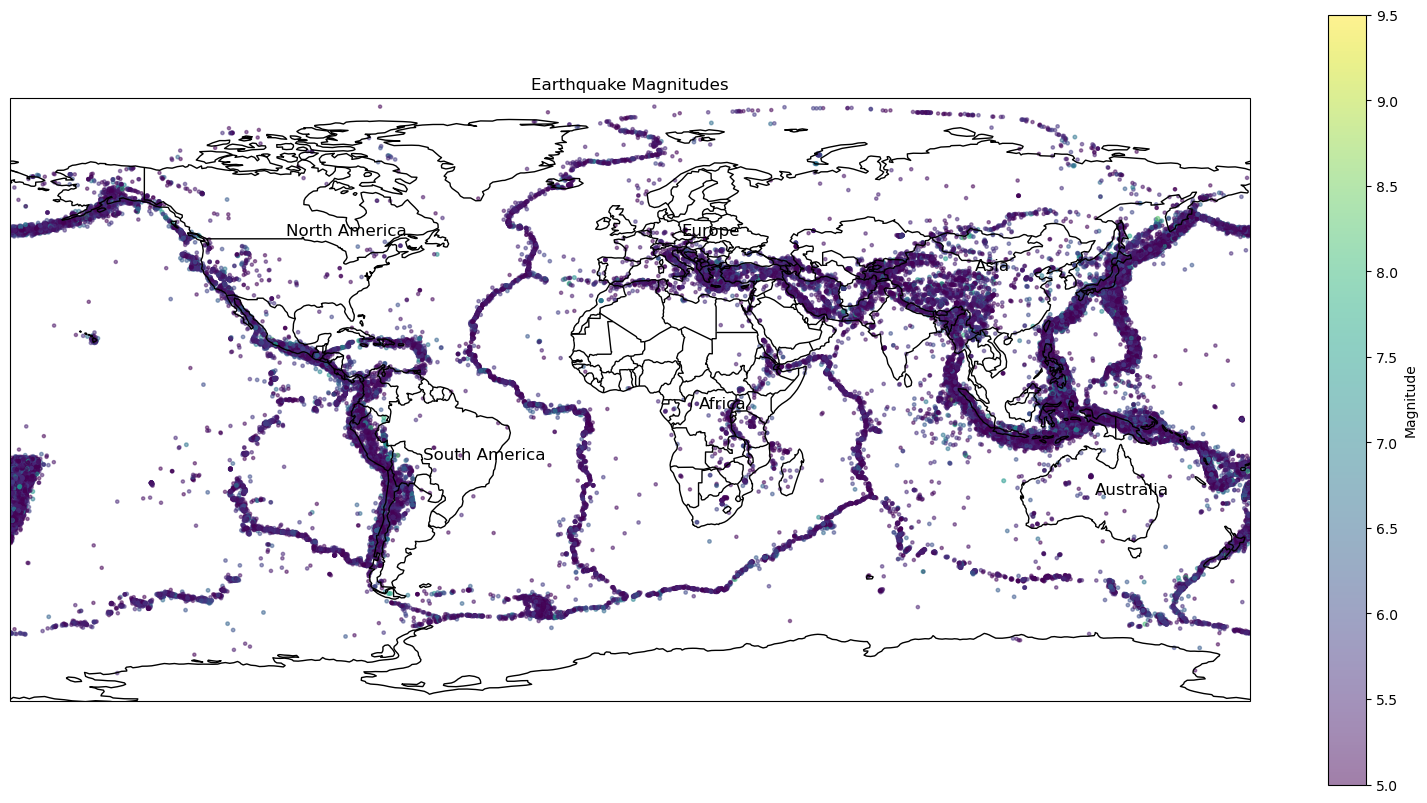

In [37]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'magnitude' is the column with earthquake magnitudes
lats = eqnull['latitude'].values
lons = eqnull['longitude'].values
mags = eqnull['mag'].values

fig = plt.gcf()
fig.set_size_inches(20, 20)

# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add country borders
ax.add_feature(cfeature.BORDERS)

# Add continent coastlines
ax.add_feature(cfeature.COASTLINE)

# Scatter plot - color and size of markers corresponds to earthquake magnitude
sc = ax.scatter(lons, lats, c=mags, s=mags, alpha=0.5, transform=ccrs.PlateCarree())

plt.colorbar(sc, label='Magnitude', shrink=0.5, pad=0.05)
plt.title('Earthquake Magnitudes')

# Add labels for continents
continents = {'Africa': (20.0, 0.0), 'Asia': (100.0, 40.0), 'Australia': (135.0, -25.0),
              'South America': (-60.0, -15.0), 'North America': (-100.0, 50.0), 'Europe': (15.0, 50.0)}
for continent, coordinates in continents.items():
    plt.text(*coordinates, continent, fontsize=12, transform=ccrs.PlateCarree())

plt.show()


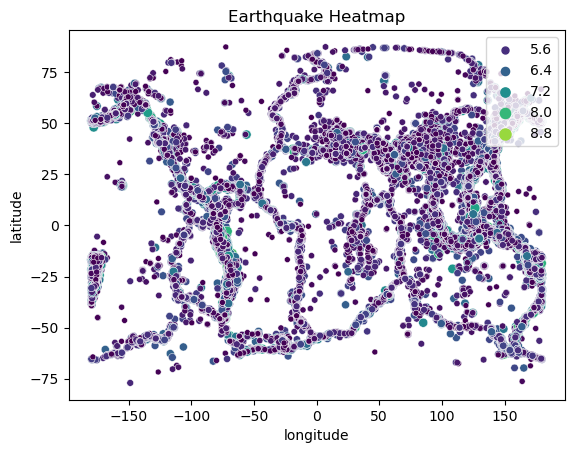

In [38]:
# quick plot of latitude and longitude columns using mag as hue and also for size of the plot points
sns.scatterplot(x='longitude', y='latitude', data=eq, hue='mag', palette='viridis', size='mag')
plt.title('Earthquake Heatmap')
plt.legend(loc='upper right')
plt.show()

In [39]:
print(allmag_pivot.columns)

Index([1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913,
       ...
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='object', name='year', length=120)


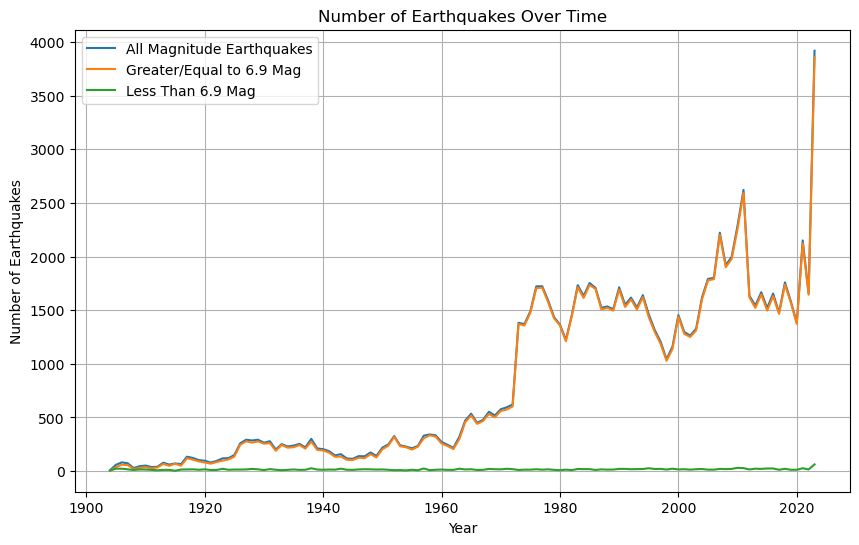

In [40]:
# Transpose the DataFrame
df_T = allmag_pivot.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_T.index, df_T['All Magnitude Earthquakes'], label='All Magnitude Earthquakes')
plt.plot(df_T.index, df_T['Greater/Equal to 6.9 Mag'], label='Greater/Equal to 6.9 Mag')
plt.plot(df_T.index, df_T['Less Than 6.9 Mag'], label='Less Than 6.9 Mag')

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# # Create a map centered around the average latitude and longitude
# map_center = [eq['latitude'].mean(), eq['longitude'].mean()]
# my_map = folium.Map(location=map_center, zoom_start=2)

# # Create a MarkerCluster layer
# marker_cluster = MarkerCluster().add_to(my_map)

# # Add markers to the cluster
# for index, row in eq.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=row['mag'] * 2,
#         color='red',
#         fill=True,
#         fill_color='red',
#         fill_opacity=0.5,
#         popup=f"Magnitude: {row['mag']}"
#     ).add_to(marker_cluster)

# # Save the map
# my_map.save("earthquake_map_clustered.html")

In [42]:
eqdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99274 entries, 16 to 99558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            99274 non-null  datetime64[ns]
 1   latitude        99274 non-null  float64       
 2   longitude       99274 non-null  float64       
 3   depth           99274 non-null  float64       
 4   mag             99274 non-null  float64       
 5   magType         99274 non-null  object        
 6   net             99274 non-null  object        
 7   id              99274 non-null  object        
 8   updated         99274 non-null  object        
 9   place           99274 non-null  object        
 10  type            99274 non-null  object        
 11  status          99274 non-null  object        
 12  locationSource  99274 non-null  object        
 13  magSource       99274 non-null  object        
 14  year            99274 non-null  int32         
dtypes: dat

In [43]:
eqdf.magType.value_counts()

magType
mb            39788
mw            24311
mwc           17458
mww           10563
ms             3157
mwb            3060
ml              414
mwr             390
md               50
mh               23
m                21
uk                8
mwp               6
fa                5
Mi                4
ml(texnet)        4
ms_20             3
mc                2
mlg               1
Md                1
Ml                1
mb_lg             1
lg                1
Mb                1
ma                1
Name: count, dtype: int64